# Tasks for laboratory assignment 2

In [1]:
# imports section

import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [2]:
import json
import os

def extract_texts_from_file(file_path):
    """
    Extract the text data from the json file
    """
    # Перевірка, чи існує файл за вказаним шляхом
    if not os.path.exists(file_path):
        # Якщо не знайшло в папці resources, пробуємо шукати в корені
        file_path = 'data.json'
        
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data['texts']

# Виклик функції
texts = extract_texts_from_file('resources/data.json')
print(f"Знайдено текстів: {len(texts)}")
print(texts[0]) # Друкуємо перший текст для перевірки

Знайдено текстів: 10
Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.


## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [5]:
import nltk

# Завантажуємо базові токенізатори
nltk.download('punkt')
# У нових версіях NLTK (3.8+) часто потрібен ще й цей пакет:
nltk.download('punkt_tab') 
# Також переконаємося, що є інші необхідні ресурси
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zapon\AppData\Roaming\nltk_data...


True

In [6]:
import re

def process_texts(texts):
    """
    Process the texts: lowercase, remove punctuation, stopwords, lemmatize.
    """
    processed_list = []
    
    # Ініціалізація (завантажуємо словники)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # spell = Speller(lang='en') # Можна увімкнути, але працює повільно

    for text in texts:
        # 1. Lowercasing
        text = text.lower()
        
        # 2. Removing Punctuation and Numbers (залишаємо тільки літери)
        text = re.sub(r'[^a-z\s]', '', text)
        
        # 3. Tokenization
        tokens = word_tokenize(text)
        
        clean_tokens = []
        for word in tokens:
            # 4. Stopwords & Lemmatization
            if word not in stop_words:
                lemma = lemmatizer.lemmatize(word)
                clean_tokens.append(lemma)
        
        # З'єднуємо назад у рядок
        processed_text = ' '.join(clean_tokens)
        processed_list.append(processed_text)

    return processed_list

# Запуск
texts_processed = process_texts(texts)
print("Оброблений текст (приклад):", texts_processed[0])

Оброблений текст (приклад): oppenheimer directed christopher nolan delf life j robert oppenheimer theoretical physicist led development atomic bomb film explores moral emotional struggle


## Visualize as cloud of words

Visualize the texts as a cloud of words.

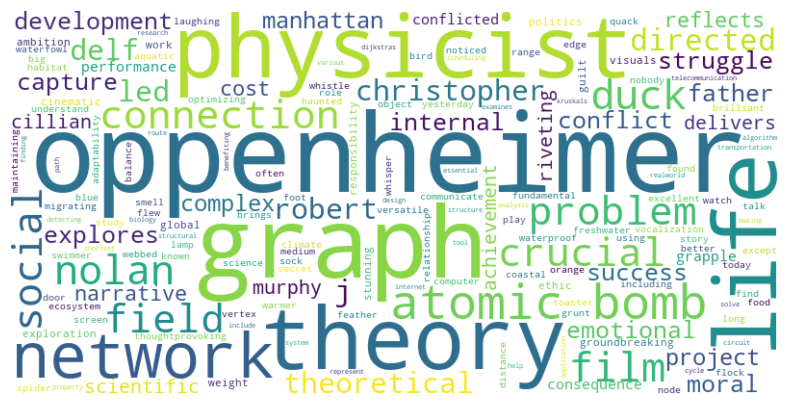

In [7]:
def visualize_texts(texts_processed):
    """
    Visualize the texts as cloud of words
    """
    # З'єднуємо всі тексти в одну велику стрічку
    combined_text = ' '.join(texts_processed)
    
    # Генеруємо хмару
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    
    # Малюємо графік
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Прибираємо ості координат
    plt.show()

# Запуск
visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [ ]:
def calcuate_tfidf(texts_processed):
    """
    Calculate TFIDF score between the texts in the list.

    Args:
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        cosine_matrix (list): a matrix of cosine similarity scores.
    """
    return None

cosine_matrix = calcuate_tfidf(texts_processed)
print(cosine_matrix)

ModuleNotFoundError: No module named 'sklearn'

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

In [ ]:
def visualize_data(cosine_matrix, texts_processed):
    """
    Visualize the cosine similarity matrix from the previous task. 

    Args:
        cosine_matrix (list): matrix of cosine similarity scores (values from 0.0 to 1.0 expected).
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        None: None.
    """
    return None

visualize_data(cosine_matrix, texts_processed)

## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

In [ ]:
def get_texts():
    """
    Get the texts you want to analyse. Either API fetching, Kaggle or any other source.

    Args:
        None: None.

    Returns:
        list: list of texts.
    """
    return None

texts = get_texts()
texts_processed = process_texts(texts)
visualize_texts(texts_processed)
cosine_matrix = calcuate_tfidf(texts_processed)
visualize_data(cosine_matrix, texts_processed)